In [ ]:
import numpy
import pandas

TARGET_VALUE = 'Price'
LAPTOP_PRICE_DATASET_FILE = 'Laptop_price.csv'
DATASET_PART_FOR_TRAIN = 0.7
LEARING_RATE = 0.5
ITERATIONS = 700

dataset = pandas.read_csv(LAPTOP_PRICE_DATASET_FILE)

#Selected features: Storage_Capacity, Processor_Speed, RAM_Size.

Better gain ratio and correlation

In [ ]:
target_values = dataset[TARGET_VALUE].values

features_list = []

for i in range(len(target_values)):
    features_list.append([
        dataset['Storage_Capacity'].values[i],
        dataset['Processor_Speed'].values[i],
        dataset['RAM_Size'].values[i]
    ])

features_array = numpy.array(features_list)

# So that Python does not crash when calculating the exponent, we standardize the distribution

Using Z score normalization

In [ ]:
avg = features_array.mean()
sigma = features_array.std()

features_array = (features_array - avg) / sigma


# Slice dataset to train and validation parts

In [ ]:
values_count = len(target_values)
train_rows_count = int(values_count * DATASET_PART_FOR_TRAIN)
test_rows_count = values_count - train_rows_count

future_values_for_train = features_array[:train_rows_count]
future_values_for_test = features_array[-test_rows_count:]


# Activation function and it's derivative

it is important that it be differentiable everywhere, the sigmoid is one of such

I'm use a fact that (sigmoid(x))' = sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def sigmoid(arg):
    return 1 / (1 + numpy.exp(-arg))

def derivative_by_arg(arg):
    return sigmoid(arg) * (1 - sigmoid(arg))

def derivative_by_sigmoid_result(sigmoid_func_result):
    return sigmoid_func_result * (1 - sigmoid_func_result)



# For classification, let's take a function from the previous lab

In [ ]:
def get_stored_interval(value: float) -> str:
  if (value <= 15000):
    return "1"
  elif (value <= 25000):
    return "2"
  else:
    return "3"

dataset_answers = []

for val in target_values:
  tmp = [0] * 3
  tmp[int(get_stored_interval(val)) - 1] = 1
  dataset_answers.append(tmp)

dataset_answers = numpy.array(dataset_answers)

target_values_for_train = dataset_answers[:train_rows_count]
target_values_for_test = dataset_answers[-test_rows_count:]


#I'm create a neural network with three layers (one hidden layer)

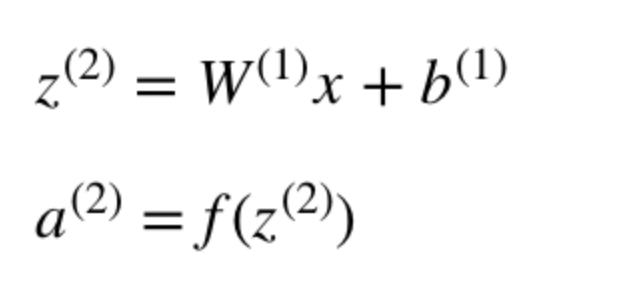

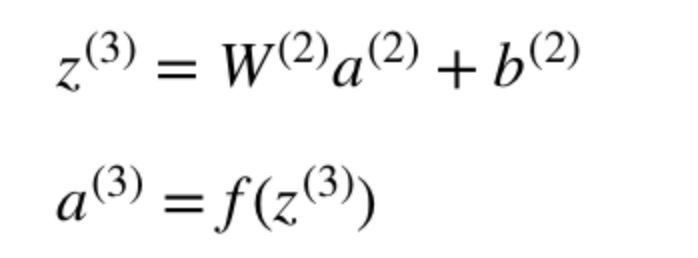

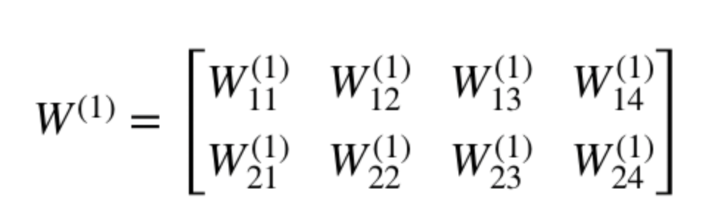

In [ ]:
def forward(features, layers_weights, bias):
  result = []

  result.append(features)
  for i in range(len(layers_weights)):
    linear_sum = numpy.dot(result[-1], layers_weights[i]) + bias[i]
    result.append(sigmoid(linear_sum))

  return result

def backward(features, target_results, result, layers_weights, bias):
  layer_idx = len(layers_weights) - 1
  while(layer_idx >= 0):
    last_layer_result = result[-1]
    err = target_results - last_layer_result
    if layer_idx == len(layers_weights) - 1:
      current_layer_delta = err * derivative_by_sigmoid_result(last_layer_result)
    else:
      err = current_layer_delta.dot(layers_weights[layer_idx + 1].T)
      current_layer_delta = err * derivative_by_sigmoid_result(result[layer_idx + 1])

    layers_weights[layer_idx] += result[layer_idx].T.dot(current_layer_delta) * LEARING_RATE / features.shape[0]
    bias[layer_idx] += numpy.sum(current_layer_delta, axis = 0, keepdims = True) * LEARING_RATE / features.shape[0]

    layer_idx -= 1

  return layers_weights, bias


def learing(features_values, targer_results, layers):
  layers_weights = []
  bias = []

  for i in range(len(layers) - 1):
      layers_weights.append(numpy.random.uniform(size=(layers[i], layers[i + 1])))
      bias.append(numpy.random.uniform(size=(1, layers[i + 1])))

  for _ in range(ITERATIONS):
    result = forward(features_values, layers_weights, bias)
    layers_weights, bias = backward(features_values, targer_results, result, layers_weights, bias)

  return layers_weights, bias


# Create and learn perceptron

In [ ]:
layers = [features_array.shape[1], 3, dataset_answers.shape[1]]
layers_weights, bias = learing(future_values_for_train, target_values_for_train, layers)

# Analyze perceptron accuracy and metrics recall, precision and summary: F-score
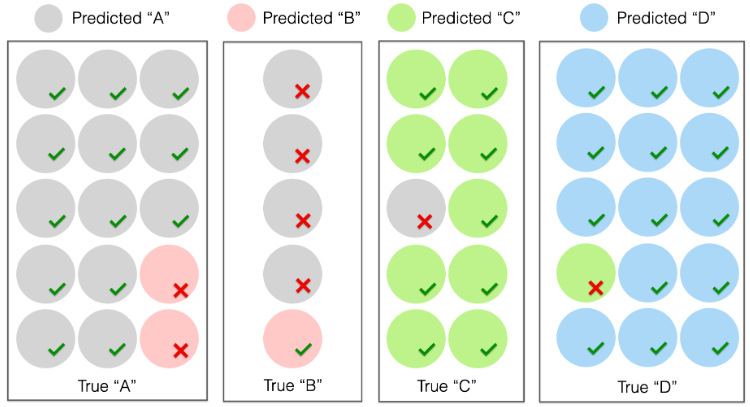

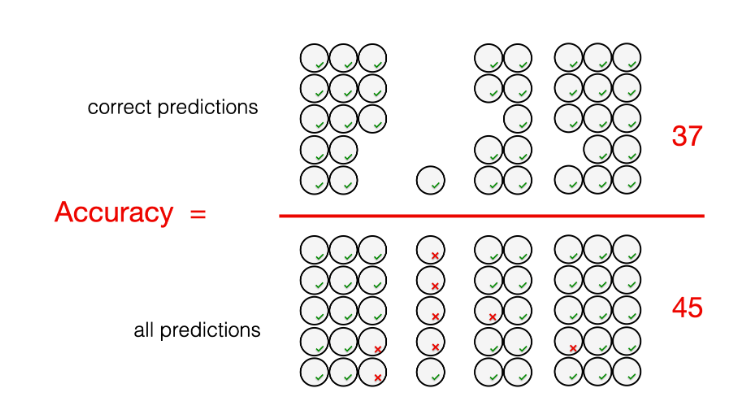

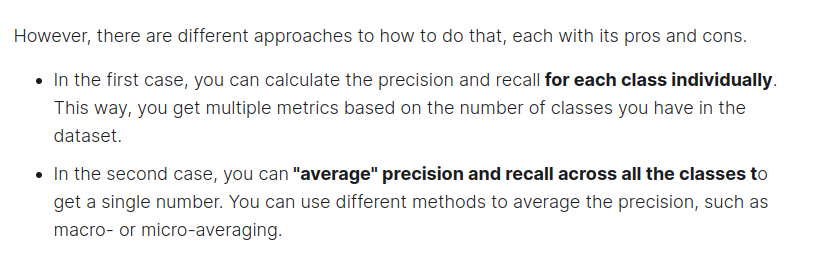

In [ ]:
predictions = forward(future_values_for_test, layers_weights, bias)[-1]
predictions_indexs = numpy.argmax(predictions, axis = 1)
target_values_for_test_indesx = numpy.argmax(target_values_for_test, axis = 1)

count = 0
for i in range(len(target_values_for_test)):
  if target_values_for_test[i][predictions_indexs[i]] == 1:
    count += 1

print(f"Accuracy: {count / 300 * 100} %")

prediction_list_format = []
target_values_list_format = []

for i in range(len(predictions)):
  prediction_list_format.append([0, 0, 0])
  target_values_list_format.append([0, 0, 0])
  prediction_list_format[i][predictions_indexs[i]] = 1
  target_values_list_format[i][target_values_for_test_indesx[i]] = 1

TP = 0
FP = 0
FN = 0

for i in range(len(prediction_list_format)):
  if prediction_list_format[i][predictions_indexs[i]] == 1 and target_values_list_format[i][predictions_indexs[i]] == 1:
    TP += 1
  elif prediction_list_format[i][predictions_indexs[i]] == 0 and target_values_list_format[i][predictions_indexs[i]] == 0:
    FP += 1
  elif prediction_list_format[i][predictions_indexs[i]] == 0 and target_values_list_format[i][predictions_indexs[i]] == 1:
    FN += 1

precision = TP / (FP + TP)
recall = TP / (FN + TP)
FScore = 2 * recall * precision / (recall + precision)

print("precision: ", precision)
print("recall: ", recall)
print("FScore: ", FScore)

Accuracy: 100.0 %
precision:  1.0
recall:  1.0
FScore:  1.0
